In [ ]:
import pandas as pd

In [ ]:
import json

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
table = {}

In [ ]:
f = open("sample_data/LLOD.json")
data=json.load(f)
df = pd.DataFrame(data)

In [ ]:
simplified = df[['title','keywords','sparql','full_download','other_download','triples', 'license']]
simplified.head()

,title,keywords,sparql,full_download,other_download,triples,license
0,OLiA,"[annotation, corpus, crossdomain, language_des...",[],"[{'media_type': '', 'description': 'Latest dow...","[{'media_type': '', 'description': 'Contains d...",43775,http://www.opendefinition.org/licenses/cc-by
1,Universal Dependencies Treebank Basque,"[corpus, linguistics, lod]",[],[],"[{'media_type': 'application/zip', 'descriptio...",121443,http://creativecommons.org/licenses/by-nc/2.0/
2,WordNet-RDF,"[lexicon, linguistics]",[],[],"[{'media_type': 'application/octet-stream', 'd...",8903374,NaN
3,Norwegian WordNet (as part of Open Multilingua...,"[lexicon, wordnet, lemon]","[{'title': 'SPARQL Endpoint', '_id': 'bba71fdd...","[{'media_type': 'application/zip', 'descriptio...","[{'media_type': 'application/zip', 'descriptio...",31467,https://wordnet.princeton.edu/license-and-comm...
4,Linguistic Metadata (LIME) vocabulary,"[ESWC, ESWC-2015, LDL, LDL-2014, OntoLex, ling...",[],[],"[{'media_type': 'text/html', 'description': 'd...",158,http://www.opendefinition.org/licenses/cc-zero


In [ ]:
results = pd.DataFrame(data={})
results['title'] = simplified[['title']]
results.head()

,title
0,OLiA
1,Universal Dependencies Treebank Basque
2,WordNet-RDF
3,Norwegian WordNet (as part of Open Multilingua...
4,Linguistic Metadata (LIME) vocabulary


In [ ]:
results['amount_of_data'] = simplified[['triples']]
results['amount_of_data'] = results['amount_of_data'].str.replace(',', '')
results['amount_of_data'] = results['amount_of_data'].fillna(0).astype(float).astype(int)
results

,title,amount_of_data
0,OLiA,43775
1,Universal Dependencies Treebank Basque,121443
2,WordNet-RDF,8903374
3,Norwegian WordNet (as part of Open Multilingua...,31467
4,Linguistic Metadata (LIME) vocabulary,158
...,...,...
222,Universal Dependencies Treebank Kazakh,6023
223,Universal Dependencies Treebank Galician-TreeGal,24219
224,CopyrightTermBank,11068
225,associations,1680000


In [ ]:
sparql_list = []
for sparql in simplified['sparql']:
  status = 0;
  if len(sparql)==0:
    status = -1 #missing
  else:
    for entry in sparql:
      if "OK" in entry['status']:
        status = 1
  sparql_list.append(status)

results['sparql'] = sparql_list
results.head()

,title,amount_of_data,data_no_outlier,sparql
0,OLiA,43775,43775.0,-1
1,Universal Dependencies Treebank Basque,121443,121443.0,-1
2,WordNet-RDF,8903374,8903374.0,-1
3,Norwegian WordNet (as part of Open Multilingua...,31467,31467.0,0
4,Linguistic Metadata (LIME) vocabulary,158,158.0,-1


In [ ]:
download_list = []
for download in simplified['full_download']:
  status = 0;
  #print(sparql)
  if len(download)==0:
    status = -1 #missing
  else:
    for entry in download:
      if "OK" in entry['status']:
        status = 1
  download_list.append(status)

results['full_download'] = download_list
#results['tocheck'] = simplified[['full_download']]
results.head()

,title,amount_of_data,data_no_outlier,sparql,full_download
0,OLiA,43775,43775.0,-1,1
1,Universal Dependencies Treebank Basque,121443,121443.0,-1,-1
2,WordNet-RDF,8903374,8903374.0,-1,-1
3,Norwegian WordNet (as part of Open Multilingua...,31467,31467.0,0,0
4,Linguistic Metadata (LIME) vocabulary,158,158.0,-1,-1


In [ ]:
download_list = []
for download in simplified['other_download']:
  status = 0;
  #print(sparql)
  if len(download)==0:
    status = -1 #missing
  else:
    for entry in download:
      if "OK" in entry['status']:
        status = 1
  download_list.append(status)

results['other_download'] = download_list
results.head()

,title,amount_of_data,data_no_outlier,sparql,full_download,other_download
0,OLiA,43775,43775.0,-1,1,1
1,Universal Dependencies Treebank Basque,121443,121443.0,-1,-1,0
2,WordNet-RDF,8903374,8903374.0,-1,-1,0
3,Norwegian WordNet (as part of Open Multilingua...,31467,31467.0,0,0,0
4,Linguistic Metadata (LIME) vocabulary,158,158.0,-1,-1,0


In [ ]:
openlicenses = [
    'http://www.opendefinition.org/licenses/cc-by',
    'http://creativecommons.org/licenses/by-nc/2.0/', #deprecated
    'https://wordnet.princeton.edu/license-and-commercial-use',
    'https://opendefinition.org/licenses/cc-zero/',
    'https://opendefinition.org/licenses/cc-by-sa/',
    'https://opendefinition.org/licenses/odc-by/',
    'https://opensource.org/license/MIT',
    'https://creativecommons.org/licenses/by-sa/3.0/', #deprecated
    'https://opendefinition.org/licenses/odc-odbl/',
    'https://www.apache.org/licenses/LICENSE-2.0',
    'https://creativecommons.org/licenses/by/3.0/', #deprecated
    'https://opendefinition.org/licenses/gfdl/',
    'https://opendatacommons.org/licenses/by/1-0/',
    'http://www.cecill.info/licences/Licence_CeCILL-C_V1-en.html',
    'https://creativecommons.org/publicdomain/zero/1.0/' #deprecated
]
deprecated = [
    'http://creativecommons.org/licenses/by-nc/2.0/', #deprecated
    'https://creativecommons.org/licenses/by-sa/3.0/', #deprecated
    'https://creativecommons.org/licenses/by/3.0/', #deprecated
    'https://creativecommons.org/publicdomain/zero/1.0/' #deprecated
]
licenses = []
for license in simplified['license']:
  if pd.isnull(license):
    licenses.append(-1)
  elif license in openlicenses:
    if license in deprecated:
      licenses.append("1 (*)")
    else:
      licenses.append(1)
  else:
    licenses.append(0)

results['openlicense'] = licenses
results.head()

,title,amount_of_data,sparql,full_download,other_download,openlicense
0,OLiA,43775,-1,1,1,1
1,Universal Dependencies Treebank Basque,121443,-1,-1,0,1 (*)
2,WordNet-RDF,8903374,-1,-1,0,-1
3,Norwegian WordNet (as part of Open Multilingua...,31467,0,0,0,1
4,Linguistic Metadata (LIME) vocabulary,158,-1,-1,0,0


In [ ]:
#versione senza deprecated
openlicenses = [
    'http://www.opendefinition.org/licenses/cc-by',
    'http://creativecommons.org/licenses/by-nc/2.0/', #deprecated
    'https://wordnet.princeton.edu/license-and-commercial-use',
    'https://opendefinition.org/licenses/cc-zero/',
    'https://opendefinition.org/licenses/cc-by-sa/',
    'https://opendefinition.org/licenses/odc-by/',
    'https://opensource.org/license/MIT',
    'https://creativecommons.org/licenses/by-sa/3.0/', #deprecated
    'https://opendefinition.org/licenses/odc-odbl/',
    'https://www.apache.org/licenses/LICENSE-2.0',
    'https://creativecommons.org/licenses/by/3.0/', #deprecated
    'https://opendefinition.org/licenses/gfdl/',
    'https://opendatacommons.org/licenses/by/1-0/',
    'http://www.cecill.info/licences/Licence_CeCILL-C_V1-en.html',
    'https://creativecommons.org/publicdomain/zero/1.0/' #deprecated
]

licenses = []
for license in simplified['license']:
  if pd.isnull(license):
    licenses.append(-1)
  elif license in openlicenses:
    licenses.append(1)
  else:
    licenses.append(0)

results['openlicense'] = licenses
results.head()

,title,amount_of_data,data_no_outlier,sparql,full_download,other_download,openlicense
0,OLiA,43775,43775.0,-1,1,1,1
1,Universal Dependencies Treebank Basque,121443,121443.0,-1,-1,0,1
2,WordNet-RDF,8903374,8903374.0,-1,-1,0,-1
3,Norwegian WordNet (as part of Open Multilingua...,31467,31467.0,0,0,0,1
4,Linguistic Metadata (LIME) vocabulary,158,158.0,-1,-1,0,0


In [ ]:
access = []
for index, row in results.iterrows():
  access.append(max(int(row['sparql']),int(row['full_download']),int(row['other_download'])))
results['access'] = access
results.head()

,title,amount_of_data,data_no_outlier,sparql,full_download,other_download,openlicense,access
0,OLiA,43775,43775.0,-1,1,1,1,1
1,Universal Dependencies Treebank Basque,121443,121443.0,-1,-1,0,1,0
2,WordNet-RDF,8903374,8903374.0,-1,-1,0,-1,0
3,Norwegian WordNet (as part of Open Multilingua...,31467,31467.0,0,0,0,1,0
4,Linguistic Metadata (LIME) vocabulary,158,158.0,-1,-1,0,0,0


In [ ]:
category = []
for keywords in simplified['keywords']:

  if 'corpus' in keywords:
    category.append("Corpora")
  elif 'thesaurus' in keywords:
      category.append("Terminologies, Thesauri and Knowledge Bases")
  elif 'lexicon' in keywords:
    category.append("Lexicons and Dictionaries")
  elif 'metadata' in keywords:
    category.append("Linguistic Resource Metadata")
  elif 'typological-database' in keywords and 'typology'in keywords:
    category.append("Typological Databases")
  elif 'linguistic' in keywords:
    category.append("Linguistic Data Categories")
  else:
    category.append("Other")

results['category'] = category
print(results.groupby("category").count())
#results.head()

                                             title  amount_of_data  \
category                                                             
Corpora                                         73              73   
Lexicons and Dictionaries                       72              72   
Linguistic Data Categories                      14              14   
Linguistic Resource Metadata                     2               2   
Other                                           50              50   
Terminologies, Thesauri and Knowledge Bases     15              15   
Typological Databases                            1               1   

                                             data_no_outlier  sparql  \
category                                                               
Corpora                                                   73      73   
Lexicons and Dictionaries                                 72      72   
Linguistic Data Categories                                14      14   
Linguisti

In [ ]:
results.head()

,title,amount_of_data,sparql,full_download,other_download,openlicense,access,category
0,OLiA,43775,-1,1,1,1,1,Corpora
1,Universal Dependencies Treebank Basque,121443,-1,-1,0,1,0,Corpora
2,WordNet-RDF,8903374,-1,-1,0,-1,0,Lexicons and Dictionaries
3,Norwegian WordNet (as part of Open Multilingua...,31467,0,0,0,1,0,Lexicons and Dictionaries
4,Linguistic Metadata (LIME) vocabulary,158,-1,-1,0,0,0,Linguistic Resource Metadata


In [ ]:
results.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount_of_data,227.0,6.661336e+07,6.480520e+08,0.0,58331.5,267631.0,776174.0,9.500000e+09
sparql,227.0,-6.607930e-01,5.756146e-01,-1.0,-1.0,-1.0,0.0,1.000000e+00
full_download,227.0,-7.444934e-01,5.202987e-01,-1.0,-1.0,-1.0,-1.0,1.000000e+00
other_download,227.0,3.259912e-01,5.639488e-01,-1.0,0.0,0.0,1.0,1.000000e+00
openlicense,227.0,2.819383e-01,7.812967e-01,-1.0,0.0,0.0,1.0,1.000000e+00
access,227.0,3.876652e-01,5.060932e-01,-1.0,0.0,0.0,1.0,1.000000e+00


{'whiskers': [<matplotlib.lines.Line2D at 0x791f2dd6dc60>,
 'caps': [<matplotlib.lines.Line2D at 0x791f2dd6ec80>,
 'boxes': [<matplotlib.lines.Line2D at 0x791f2de04430>],
 'medians': [<matplotlib.lines.Line2D at 0x791f2dd6f4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x791f2dd6dd20>],
 'means': []}

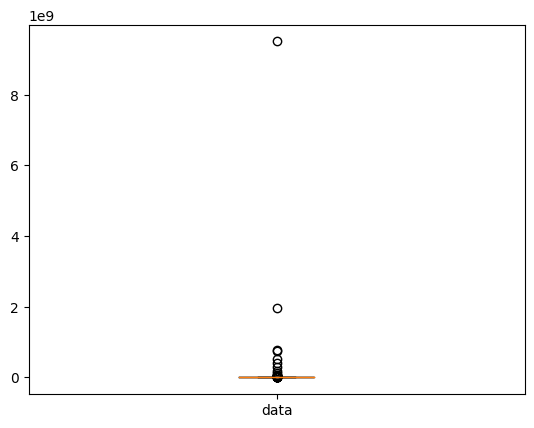

In [ ]:
plt.boxplot([results['amount_of_data'].values], labels=['data'])

In [ ]:
#non mi sembra un approccio pulito
#results['data_no_outlier'] = results['amount_of_data']
#results['data_no_outlier'][(results['data_no_outlier']>(np.mean(results['data_no_outlier'])+2*np.std(results['data_no_outlier']))) | (results['data_no_outlier']<(np.mean(results['data_no_outlier'])-2*np.std(results['data_no_outlier'])))]=np.nan
#results['data_no_outlier'][(results['data_no_outlier']>(np.mean(results['data_no_outlier'])+2*np.std(results['data_no_outlier']))) | (results['data_no_outlier']<(np.mean(results['data_no_outlier'])-2*np.std(results['data_no_outlier'])))]=np.nan
#results['data_no_outlier'][(results['data_no_outlier']>(np.mean(results['data_no_outlier'])+2*np.std(results['data_no_outlier']))) | (results['data_no_outlier']<(np.mean(results['data_no_outlier'])-2*np.std(results['data_no_outlier'])))]=np.nan
#results['data_no_outlier'][(results['data_no_outlier']>(np.mean(results['data_no_outlier'])+2*np.std(results['data_no_outlier']))) | (results['data_no_outlier']<(np.mean(results['data_no_outlier'])-2*np.std(results['data_no_outlier'])))]=np.nan
#results['data_no_outlier'][(results['data_no_outlier']>(np.mean(results['data_no_outlier'])+2*np.std(results['data_no_outlier']))) | (results['data_no_outlier']<(np.mean(results['data_no_outlier'])-2*np.std(results['data_no_outlier'])))]=np.nan
#results['data_no_outlier'][(results['data_no_outlier']>(np.mean(results['data_no_outlier'])+2*np.std(results['data_no_outlier']))) | (results['data_no_outlier']<(np.mean(results['data_no_outlier'])-2*np.std(results['data_no_outlier'])))]=np.nan
#results['data_no_outlier'][(results['data_no_outlier']>(np.mean(results['data_no_outlier'])+2*np.std(results['data_no_outlier']))) | (results['data_no_outlier']<(np.mean(results['data_no_outlier'])-2*np.std(results['data_no_outlier'])))]=np.nan
#results['data_no_outlier'][(results['data_no_outlier']>(np.mean(results['data_no_outlier'])+2*np.std(results['data_no_outlier']))) | (results['data_no_outlier']<(np.mean(results['data_no_outlier'])-2*np.std(results['data_no_outlier'])))]=np.nan
#results

<ipython-input-88-ad2ea73e289b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['data_no_outlier'][(results['data_no_outlier']>(np.mean(results['data_no_outlier'])+2*np.std(results['data_no_outlier']))) | (results['data_no_outlier']<(np.mean(results['data_no_outlier'])-2*np.std(results['data_no_outlier'])))]=np.nan


,title,amount_of_data,data_no_outlier,sparql,full_download,other_download,openlicense,access,category
0,OLiA,43775,43775.0,-1,1,1,1,1,Corpora
1,Universal Dependencies Treebank Basque,121443,121443.0,-1,-1,0,1,0,Corpora
2,WordNet-RDF,8903374,NaN,-1,-1,0,-1,0,Lexicons and Dictionaries
3,Norwegian WordNet (as part of Open Multilingua...,31467,31467.0,0,0,0,1,0,Lexicons and Dictionaries
4,Linguistic Metadata (LIME) vocabulary,158,158.0,-1,-1,0,0,0,Linguistic Resource Metadata
...,...,...,...,...,...,...,...,...,...
222,Universal Dependencies Treebank Kazakh,6023,6023.0,-1,-1,0,0,0,Corpora
223,Universal Dependencies Treebank Galician-TreeGal,24219,24219.0,-1,-1,0,-1,0,Corpora
224,CopyrightTermBank,11068,11068.0,-1,-1,1,1,1,Lexicons and Dictionaries
225,associations,1680000,NaN,-1,0,1,0,1,"Terminologies, Thesauri and Knowledge Bases"


array([<Axes: title={'center': 'sparql'}, ylabel='category'>,
       <Axes: title={'center': 'access'}, ylabel='category'>,
       <Axes: title={'center': 'openlicense'}, ylabel='category'>,
       <Axes: title={'center': 'amount_of_data'}, ylabel='category'>],
      dtype=object)

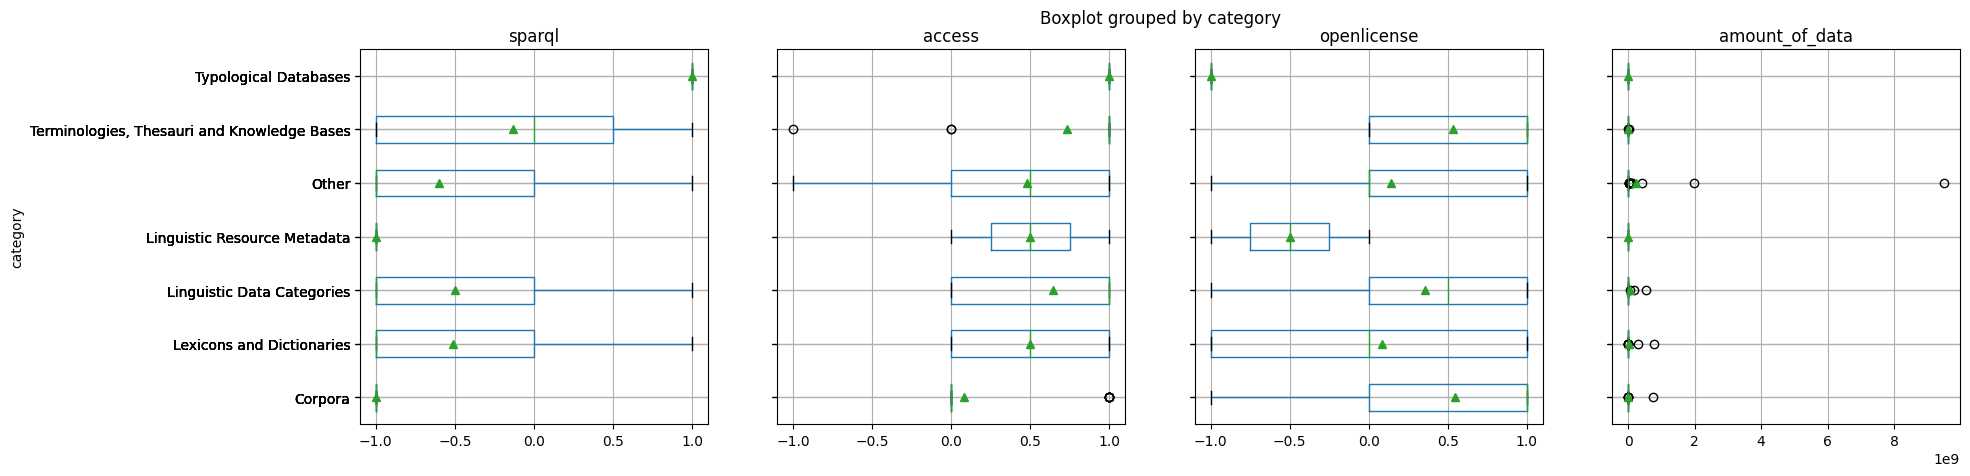

In [ ]:
results.boxplot(['sparql', 'access', 'openlicense', 'amount_of_data'], by = 'category', layout=(1,4), figsize = (20,5), showmeans = True, sharex=False,  vert=False)

array([[<Axes: title={'center': 'amount_of_data'}, ylabel='category'>,
        <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

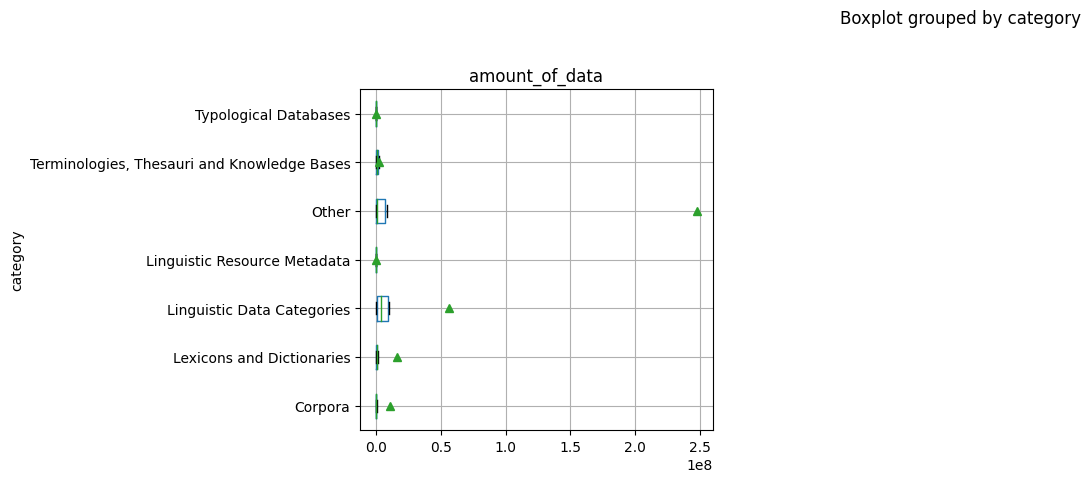

In [ ]:
results.boxplot(['amount_of_data'], by = 'category', layout=(2,3), figsize = (15,10), showmeans = True, sharex=False,  vert=False, showfliers = False)

In [ ]:
syntesis = pd.DataFrame(data={})
for name, group in results.groupby("category"):
  #print(group.value_counts())
  print(name)
  print(group.describe().transpose())

Corpora
                count          mean           std    min      25%       50%  \
amount_of_data   73.0  1.057028e+07  8.699429e+07  672.0  43775.0  121923.0   
sparql           73.0 -1.000000e+00  0.000000e+00   -1.0     -1.0      -1.0   
full_download    73.0 -9.589041e-01  2.602539e-01   -1.0     -1.0      -1.0   
other_download   73.0  8.219178e-02  2.765574e-01    0.0      0.0       0.0   
openlicense      73.0  5.479452e-01  6.245242e-01   -1.0      0.0       1.0   
access           73.0  8.219178e-02  2.765574e-01    0.0      0.0       0.0   

                     75%          max  
amount_of_data  254830.0  743532157.0  
sparql              -1.0         -1.0  
full_download       -1.0          1.0  
other_download       0.0          1.0  
openlicense          1.0          1.0  
access               0.0          1.0  
Lexicons and Dictionaries
                count          mean           std  min        25%       50%  \
amount_of_data   72.0  1.594831e+07  9.859224e+07  0.

In [ ]:
print(len(results['access']))
print("Open license", (results['openlicense']==1).sum())

print("Access", (results['access']==1).sum())
print("Data via Access", (results['amount_of_data'][results['access']==1].sum()))

print("SPARQL", (results['sparql']==1).sum())
print("Data via SPARQL", (results['amount_of_data'][results['sparql']==1].sum()))

print("Open license AND Access", ((results['openlicense']==1)&(results['access']==1)).sum())
print("Data via Open license AND Access", (results['amount_of_data'][(results['openlicense']==1)&(results['access']==1)].sum()))

print("Open license AND SPARQL", ((results['openlicense']==1)&(results['sparql']==1)).sum())
print("Data via Open license AND SPARQL", (results['amount_of_data'][(results['openlicense']==1)&(results['sparql']==1)].sum()))

print(results[(results['openlicense']==1)&(results['sparql']==1)])

227
Open license 110
Access 90
Data via Access 13307019306
SPARQL 12
Data via SPARQL 430741315
Open license AND Access 31
Data via Open license AND Access 894030460
Open license AND SPARQL 4
Data via Open license AND SPARQL 8688500
                                           title  amount_of_data  \
24                                    SALDOM-RDF         8349115   
51                                     SweFN-RDF          339385   
87                                     SALDO-RDF               0   
208  Lexicon of Syntactic and Semantic Framework               0   

     data_no_outlier  sparql  full_download  other_download  openlicense  \
24               NaN       1             -1               1            1   
51          339385.0       1             -1               1            1   
87               0.0       1             -1               1            1   
208              0.0       1              1              -1            1   

     access                    category  
24  

In [ ]:
for name, group in results.groupby("category"):
  print(name)
  print(len(group))
  print("Open license", (group['openlicense']==1).sum())

  print("Access", (group['access']==1).sum())
  print("Data via Access", (group['amount_of_data'][group['access']==1].sum()))

  print("SPARQL", (group['sparql']==1).sum())
  print("Data via SPARQL", (group['amount_of_data'][group['sparql']==1].sum()))

  print("Open license AND Access ", ((group['openlicense']==1)&(group['access']==1)).sum())
  print("Data via Open license AND Access", (group['amount_of_data'][(group['openlicense']==1)&(group['access']==1)].sum()))

  print("Open license AND SPARQL", ((group['openlicense']==1)&(group['sparql']==1)).sum())
  print("Data via Open license AND SPARQL", (group['amount_of_data'][(group['openlicense']==1)&(group['sparql']==1)].sum()))

  print(group[(group['openlicense']==1)&(group['sparql']==1)])
  print("---")

Corpora
73
Open license 45
Access 6
Data via Access 744025226
SPARQL 0
Data via SPARQL 0
Open license AND Access  5
Data via Open license AND Access 743605226
Open license AND SPARQL 0
Data via Open license AND SPARQL 0
Empty DataFrame
Columns: [title, amount_of_data, data_no_outlier, sparql, full_download, other_download, openlicense, access, category]
Index: []
---
Lexicons and Dictionaries
72
Open license 34
Access 36
Data via Access 322464484
SPARQL 2
Data via SPARQL 0
Open license AND Access  8
Data via Open license AND Access 4166084
Open license AND SPARQL 2
Data via Open license AND SPARQL 0
                                           title  amount_of_data  \
87                                     SALDO-RDF               0   
208  Lexicon of Syntactic and Semantic Framework               0   

     data_no_outlier  sparql  full_download  other_download  openlicense  \
87               0.0       1             -1               1            1   
208              0.0       1        